In [257]:
#import necessary modules
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

For Capstone 2, I will be investigating a dataset containing information about various physical attributes of crab in an effort to try to use the data to predict crab age. A summary of each column found in the dataset can be found below: <br>

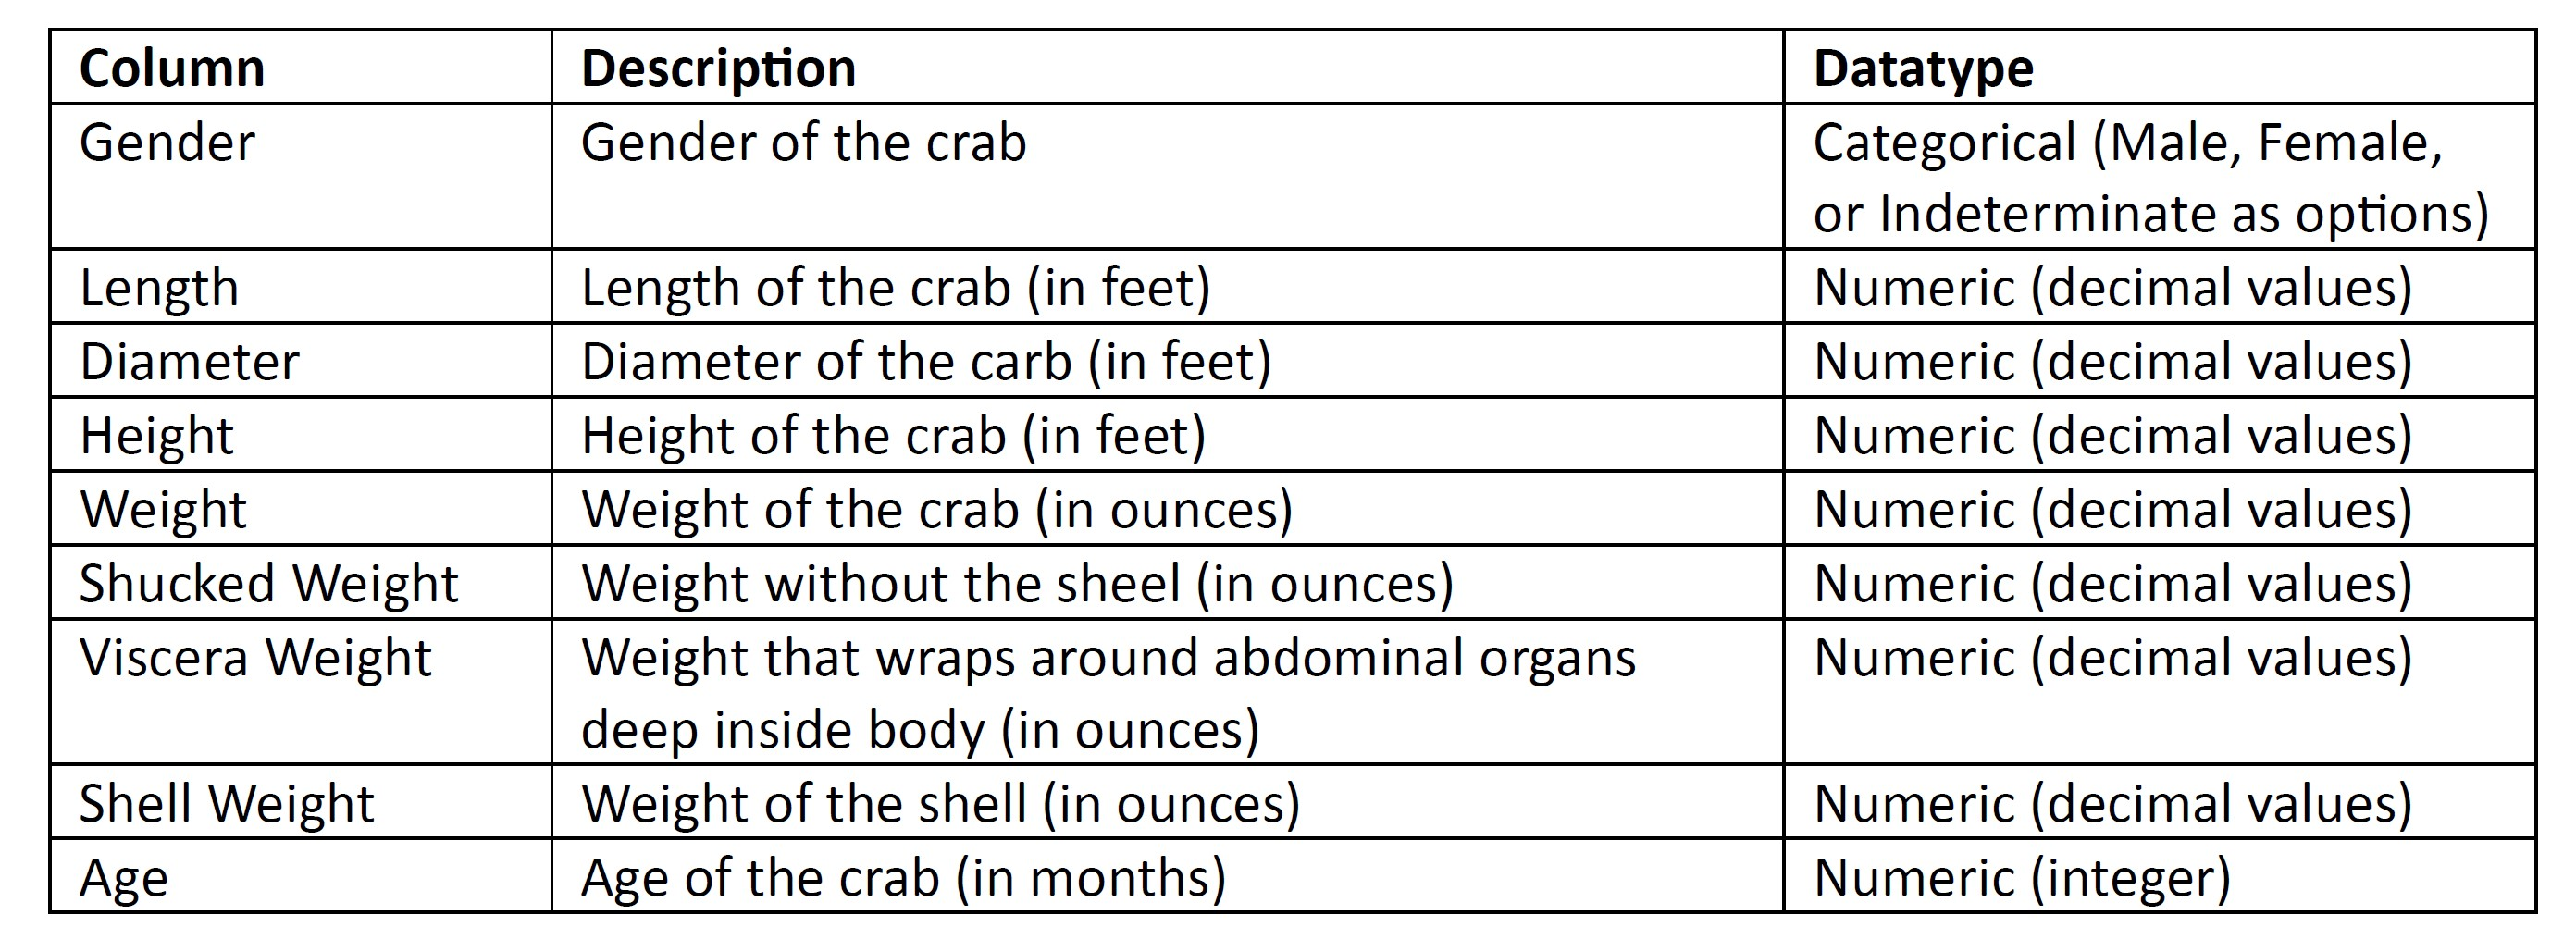

In [258]:
#Read in CSV file in raw_data directory
crab_df = pd.read_csv('./raw_data/syn_crab_data.csv')

In [259]:
#Review crab_df to ensure observations look as expected
crab_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [260]:
#Check column names 
crab_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [261]:
#Rename columns containing spaces for ease of working with data - 'Shucked Weight', 'Viscera Weight', 'Shell Weight'
crab_df = crab_df.rename(columns={"Shucked Weight": "Shucked_Weight", "Viscera Weight": "Viscera_Weight", "Shell Weight": "Shell_Weight"})

In [262]:
#Review crab_df
#displays index, dtype, columns, non-null values, memory usage
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50000 non-null  int64  
 1   Sex             50000 non-null  object 
 2   Length          50000 non-null  float64
 3   Diameter        50000 non-null  float64
 4   Height          50000 non-null  float64
 5   Weight          50000 non-null  float64
 6   Shucked_Weight  50000 non-null  float64
 7   Viscera_Weight  50000 non-null  float64
 8   Shell_Weight    50000 non-null  float64
 9   Age             50000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 3.8+ MB


In [263]:
#Review size of crab_df
crab_df.shape

(50000, 10)

In [264]:
#check indexing of crab-df dataframe
crab_df.index

RangeIndex(start=0, stop=50000, step=1)

In [265]:
#Summary statistics of numeric properties of crab_df dataframe, excluding unique 'id' (by default only includes variables of numeric type)
crab_df.drop(['id'], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Length,50000.0,1.313177,0.296728,0.000000,1.137500,1.375000,1.537500,2.350000
Diameter,50000.0,1.020809,0.244330,0.000000,0.875000,1.062500,1.200000,1.637500
Height,50000.0,0.347068,0.094519,0.000000,0.287500,0.362500,0.412500,2.275000
Weight,50000.0,23.416627,13.196150,0.042524,13.012420,23.402512,32.431828,80.101512
Shucked_Weight,50000.0,10.122631,5.905587,0.028349,5.528153,9.823102,14.047177,49.810071
Viscera_Weight,50000.0,5.044229,2.914782,0.012814,2.721552,4.861939,7.016501,21.545620
Shell_Weight,50000.0,6.709261,3.726042,0.042524,3.827183,6.761356,9.086015,30.461538
Age,50000.0,9.972820,3.222112,1.000000,8.000000,10.000000,11.000000,29.000000


In [266]:
#Create a dataframe containing only numeric attribute variables
crab_num_var = crab_df.drop(['id', 'Sex'], axis = 1)

In [267]:
#Check range for each numeric column
#Create dictionary to hold range of each column
col_ranges = {}
for col in crab_num_var:
    col_ranges[col] =crab_num_var[col].max() - crab_num_var[col].min()

#Create dataframe to more easily review ranges per column
col_range_df = pd.DataFrame(list(col_ranges.items()))
col_range_df.columns = ['Column_Name', 'Range']

In [268]:
#Review col_range_df
col_range_df

,Column_Name,Range
0,Length,2.350000
1,Diameter,1.637500
2,Height,2.275000
3,Weight,80.058988
4,Shucked_Weight,49.781722
5,Viscera_Weight,21.532805
6,Shell_Weight,30.419014
7,Age,28.000000


In [269]:
#Check median of each numeric column
#Create dictionary to hold median of each column
col_median = {}
for col in crab_num_var:
    col_median[col] =crab_num_var[col].median()

#Create dataframe to more easily review median per column
col_median_df = pd.DataFrame(list(col_median.items()))
col_median_df.columns = ['Column_Name', 'Median']

In [270]:
#Inspect col_median_df
col_median_df

,Column_Name,Median
0,Length,1.375000
1,Diameter,1.062500
2,Height,0.362500
3,Weight,23.402512
4,Shucked_Weight,9.823102
5,Viscera_Weight,4.861939
6,Shell_Weight,6.761356
7,Age,10.000000


In [271]:
#Check mode of each numeric column
#Create dictionary to hold mode of each column
col_mode = {}
for col in crab_num_var:
    col_mode[col] =crab_num_var[col].mode()[0]

#Create dataframe to more easily review mode for each column
col_mode_df = pd.DataFrame(list(col_mode.items()))
col_mode_df.columns = ['Column_Name', 'Mode']

In [272]:
#Inspect col_mode_df
col_mode_df

,Column_Name,Mode
0,Length,1.562500
1,Diameter,1.125000
2,Height,0.375000
3,Weight,6.307764
4,Shucked_Weight,2.721552
5,Viscera_Weight,4.861939
6,Shell_Weight,8.930093
7,Age,9.000000


In [273]:
#Store number of unique value counts for each column in the dataframe
nuniq_dict = {}
for col in crab_df:
    nuniq_dict[col] = crab_df[col].nunique()

#Create dataframe to more easily review unique value counts per column
nuniq_df = pd.DataFrame(list(nuniq_dict.items()))
nuniq_df.columns = ['Column_Name', 'Number_of_Unique_Values']

In [274]:
#Inspect dictionary of column name & number of unique values
nuniq_df

,Column_Name,Number_of_Unique_Values
0,id,50000
1,Sex,4
2,Length,150
3,Diameter,131
4,Height,63
5,Weight,3124
6,Shucked_Weight,1832
7,Viscera_Weight,992
8,Shell_Weight,1024
9,Age,28


In [275]:
#Understand % unique values in each column when looking at all values of specified column in dataframe, exlcuding id which 
#has all values that are unique as they are unique identifiers for each crab included
uniq_perc_dict = {}
for col in crab_df:
    if col != 'id':
        uniq_perc_dict[col] = ((crab_df[col].nunique())/(len(crab_df)))*100

#Create dataframe to more easily review % unique values per column
uniq_perc_df = pd.DataFrame(list(uniq_perc_dict.items()))
uniq_perc_df.columns = ['Column_Name', 'Perc_Unique_Values']

In [276]:
#Inspect dictionary of column name & percent unique values compared to total observations in column
uniq_perc_df

,Column_Name,Perc_Unique_Values
0,Sex,0.008
1,Length,0.300
2,Diameter,0.262
3,Height,0.126
4,Weight,6.248
5,Shucked_Weight,3.664
6,Viscera_Weight,1.984
7,Shell_Weight,2.048
8,Age,0.056


In [277]:
#Store unique values for each column in the dataframe
uniq_dict = {}
for col in crab_df:
    uniq_dict[col] = (crab_df[col].drop_duplicates().sort_values(ascending = True))

In [278]:
#Inspect dictionary of column name & number of unique values
uniq_dict

{'id': 0            0
 1            1
 2            2
 3            3
 4            4
          ...  
 49995    49995
 49996    49996
 49997    49997
 49998    49998
 49999    49999
 Name: id, Length: 50000, dtype: int64,
 'Sex': 49935    1
 9        F
 0        I
 1        M
 Name: Sex, dtype: object,
 'Length': 2655     0.0000
 604      0.0875
 4361     0.1875
 632      0.2625
 1552     0.2750
           ...  
 16750    1.9625
 28609    1.9875
 1535     2.0000
 29588    2.0375
 14348    2.3500
 Name: Length, Length: 150, dtype: float64,
 'Diameter': 124      0.0000
 20886    0.1000
 13654    0.1125
 48681    0.1375
 39417    0.1500
           ...  
 7385     1.5500
 33515    1.5625
 1535     1.5750
 23626    1.6125
 7103     1.6375
 Name: Diameter, Length: 131, dtype: float64,
 'Height': 60       0.0000
 166      0.0125
 124      0.0250
 10760    0.0375
 2569     0.0500
           ...  
 21631    0.7250
 49411    0.7500
 11962    0.8000
 35243    0.8125
 49297    2.2750
 Name: Height

It looks like there are a few observations of 'Length', 'Diameter', & 'Height' that are zero values. These are all physical dimensions of a crab so they should have a numeric value higher than 0. Let's filter the dataframe to see how many observations have a 0 value recorded for these attributes and what the other variables in these observations read. Depending on the number and what the rest of the observation looks like (i.e. also has physical dimension attributes with 0 values), it may make sense to drop these observations.

In [279]:
#Check the 'Length', 'Diameter', & 'Height' observations that have values of 0
#Create a list containing these column names
col_list = ['Length', 'Diameter', 'Height']

#Use a for-loop to check the number of observations for each column value  in col_list are 0
for col in col_list:
    print(col, ": ")
    print(len(crab_df[crab_df[col] == 0]))   

Length : 
2
Diameter : 
9
Height : 
42


In [280]:
#Inspect observations where 'Length' == 0
crab_df[crab_df['Length'] == 0]

,id,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
2655,2655,I,0.0,0.2625,0.0250,0.666213,0.141747,0.085048,0.141747,4.0
23882,23882,I,0.0,0.2625,0.0875,0.297670,0.155922,0.085048,0.113398,3.0


In [281]:
#Inspect observations where 'Diameter' == 0
crab_df[crab_df['Diameter'] == 0]

,id,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
124,124,I,0.3875,0.0,0.0250,0.411068,0.141747,0.075049,0.184272,4.0
604,604,I,0.0875,0.0,0.0625,0.411068,0.141747,0.085048,0.184272,4.0
10804,10804,I,0.4000,0.0,0.0875,0.595340,0.212621,0.127573,0.141747,4.0
17478,17478,I,0.3250,0.0,0.0875,0.496116,0.141747,0.099223,0.141747,4.0
26774,26774,I,0.2625,0.0,0.0875,0.496116,0.141747,0.099223,0.141747,4.0
27416,27416,I,0.4000,0.0,0.0875,0.411068,0.155922,0.085048,0.141747,3.0
33896,33896,I,0.3125,0.0,0.1250,0.666213,0.070874,0.226796,0.085048,4.0
37390,37390,I,0.2750,0.0,0.0750,0.850485,0.184272,0.085048,0.141747,4.0
49209,49209,I,0.3000,0.0,0.0375,0.595340,0.212621,0.127573,0.212621,3.0


In [282]:
#Inspect observations where 'Height' == 0
crab_df[crab_df['Height'] == 0]

,id,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
60,60,I,0.8250,0.5625,0.0,4.224075,1.686795,0.807961,1.559222,5.0
632,632,I,0.2625,0.2250,0.0,0.340194,0.141747,0.085048,0.099223,4.0
1348,1348,I,0.6250,0.4500,0.0,1.672621,0.737087,0.184272,0.566990,4.0
2802,2802,I,0.5000,0.3750,0.0,1.828543,0.354369,0.226796,0.311845,4.0
3522,3522,I,0.5250,0.3750,0.0,2.126212,0.694563,0.623689,0.425243,7.0
4918,4918,I,0.5625,0.4625,0.0,1.459999,0.538640,0.382718,0.481942,5.0
7534,7534,I,0.4750,0.3250,0.0,0.893009,0.354369,0.141747,0.297670,4.0
9724,9724,M,0.8375,0.6000,0.0,5.301356,2.267960,1.119805,1.559222,5.0
9831,9831,I,0.7500,0.5500,0.0,3.614561,1.658446,0.779611,1.091456,5.0
12249,12249,I,0.7250,0.5375,0.0,4.422522,1.913591,0.722912,1.020582,5.0


Itt does look like all other physical numeric attributes have nonzero values for observations containing 0 values for 'Length', 'Diameter', and 'Height'. However, it doesn't make sense to keep these observations because a crab won't ever have 0 values for length, diameter, or height. This also only ends up being 53 observations that are removed, which in a dataframe of 50,000 observations is quite a minimal impact.

In [283]:
#Remove observations containing 0 values for 'Length', 'Height', 'Diameter'
crab_df = crab_df.loc[(crab_df['Length'] != 0) & (crab_df['Height'] != 0) & (crab_df['Diameter'] !=0)]

In [284]:
#Use a for-loop to check 0 observations in 'Length', 'Height', & 'Diameter' columns were removed
#col_list was defined above and contains 'Length', 'Height', & 'Diameter' as values
for col in col_list:
    print(col, ": ")
    print(len(crab_df[crab_df[col] == 0]))   

Length : 
0
Diameter : 
0
Height : 
0


Now that the observations containing 0 values for 'Length', 'Height', and 'Diameter' were removed, let's take a closer look at the unique values of Gender as it looked like '1' was mistakenly included. 

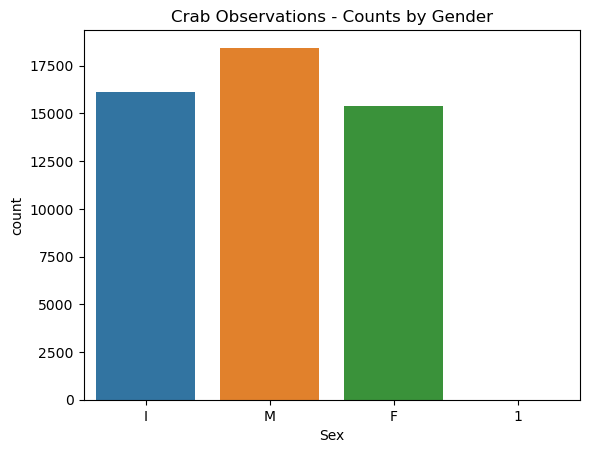

In [285]:
#Check distribution of gender categorical observations
sns.countplot(data = crab_df, x = 'Sex')
plt.title('Crab Observations - Counts by Gender')
plt.show()

Hmm... this is interesting, it looks like some Gender observations may mistakenly have been recorded as 1 (crab gender should be M for male, F for female, or I for indeterminate). Let's check the counts for each unique value of gender below to see if this is the case.

Otherwise, the number of observations per Gender in the dataset is fairly evenly distributed which is good. Male gender has slightly higher number of observations and female gender has slightly lower number of observations- which is something to keep note of moving forward

In [286]:
#Check counts of each unique value for crab gender
crab_df['Sex'].value_counts()

Sex
M    18446
I    16128
F    15372
1        1
Name: count, dtype: int64

Since only 1 observation was mistakenly recorded with Gender of '1' in dataframe that has 50,000 observations- this is a very minor problem. I imagine this is an error where '1' should have been 'I' for Indeterminate so I will replace this value instead of dropping it.

In [287]:
#Replace observation with 'Gender' = '1' to 'Gender' = 'I'
crab_df['Sex'] = crab_df['Sex'].replace(to_replace = '1', value = 'I')

In [288]:
#Verify replacement of incorrect gender value was successful
crab_df['Sex'].value_counts()

Sex
M    18446
I    16129
F    15372
Name: count, dtype: int64

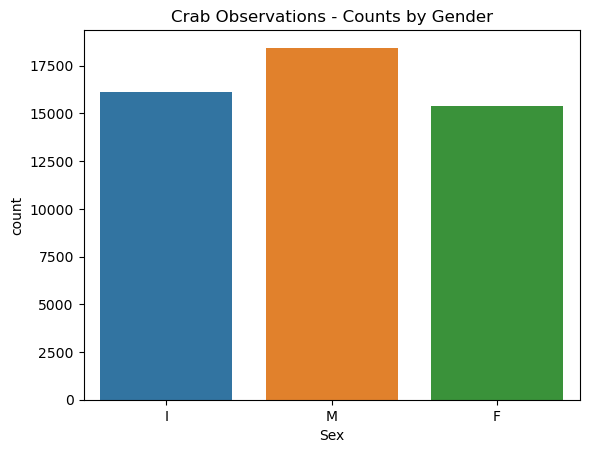

In [289]:
#Re-check distribution of gender categorical observations
sns.countplot(data = crab_df, x = 'Sex')
plt.title('Crab Observations - Counts by Gender')
plt.show()

Next let's review the distributions of each numeric attribute variable to see if there's any trends of note, outliers etc.

In [290]:
#1st create dataframe containing only numeric attribute variables
crab_num_var = crab_df.drop(['id', 'Sex'], axis = 1)

In [291]:
#Check creation of dataframe containing only numeric attribute variables was completed correctly
crab_num_var.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


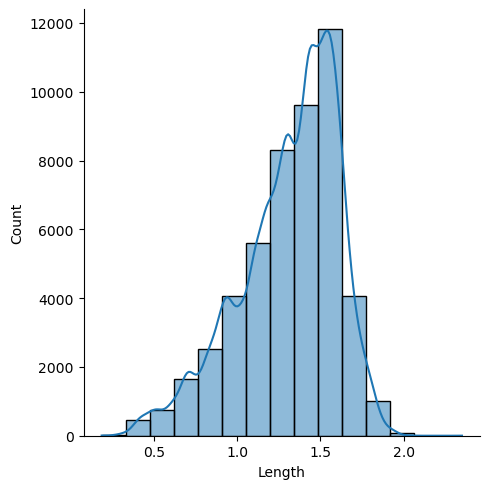

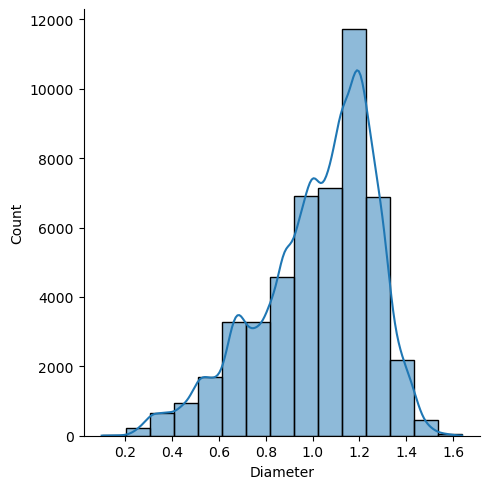

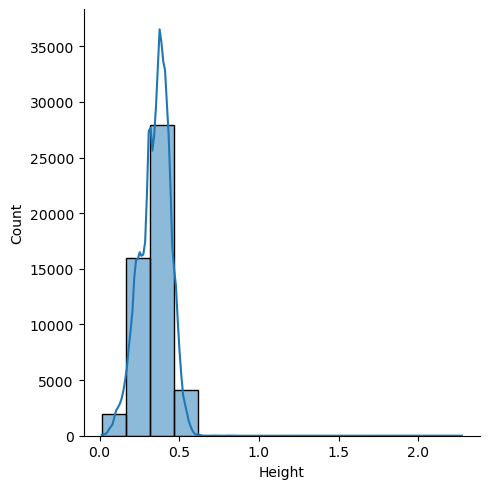

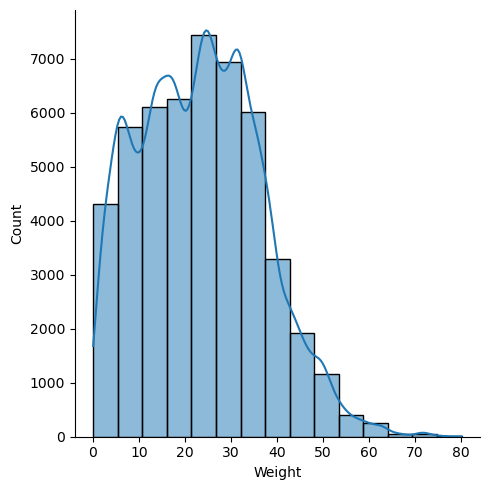

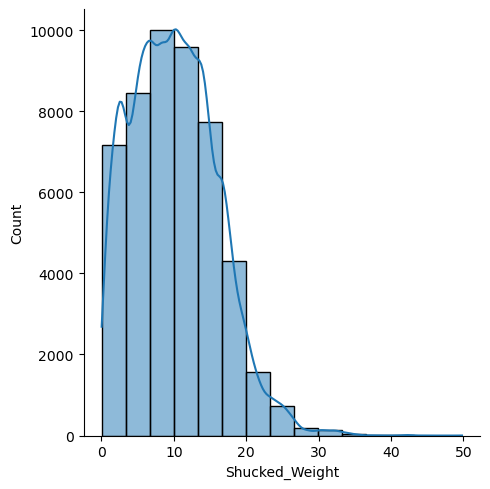

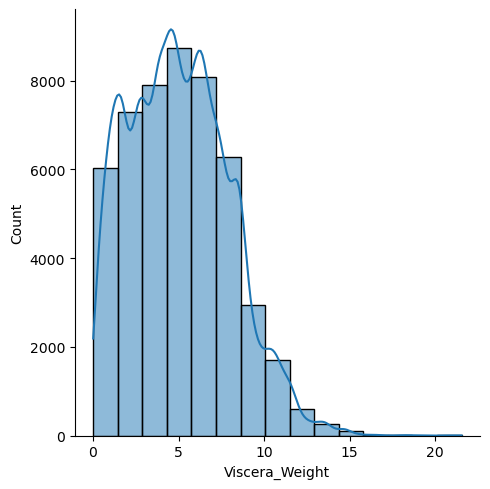

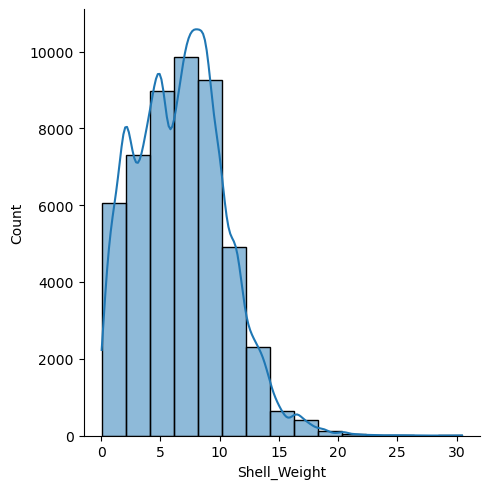

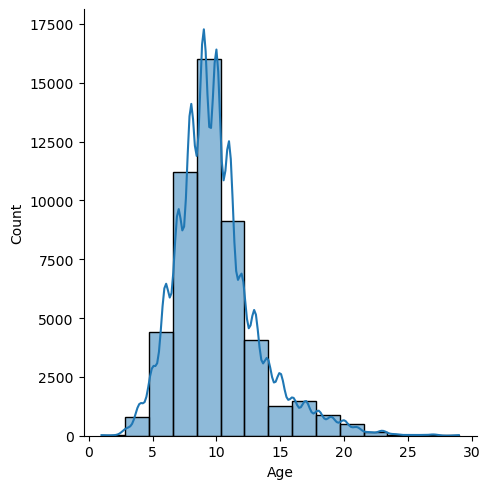

In [292]:
#Check distribution of each numeric variable
for col in crab_num_var:
    sns.displot(crab_num_var, x = col, kde=True, bins=15)
    plt.show()

It definitely looks like some variable distributions for each attribute. <br>
<br>
-  'Height' and 'Age' look like the only attributes that have close to a normal distribution. Even 'Age' looks a bit right-skewed.<br>
<br>
-  'Length' and 'Diameter' are left-skewed.
<br>
<br>
-  'Weight', 'Shucked Weight', 'Viscera Weight', and 'Shell Weight'are right-skewed.
<br>
<br>
For now, it is important to note the relative distribution of each attribute but without having much information on expected values of each of these attributes for a crab (aside from the fact that since they are dimensions, they should be greater than 0), all observations that might be considered outliers will be kept.

In [293]:
#Check % of duplicate observations in each numeric column
#Create dictionary to hold % duplicates of each numeric column
col_dup = {}
for col in crab_num_var:
    col_dup[col] =(crab_num_var[col].duplicated().value_counts()[0])/(len(crab_num_var))*100

#Create dataframe to more easily review % of duplicates per numeric column
col_dup_df = pd.DataFrame(list(col_dup.items()))
col_dup_df.columns = ['Column_Name', 'Number_of_Duplicates']

In [294]:
#Review % of duplicate values in each column
col_dup_df

,Column_Name,Number_of_Duplicates
0,Length,99.703686
1,Diameter,99.741726
2,Height,99.875868
3,Weight,93.747372
4,Shucked_Weight,96.332112
5,Viscera_Weight,98.013895
6,Shell_Weight,97.949827
7,Age,99.943941


Based on the number/percentage of unique values for each numeric column investigated previously, each observation in each column is definitely not a unique value (i.e. the dataset does not contain 50,000 crabs each with unique values for each attribute etc). It makes sense that certain crabs will have the same 'Height' or 'Length' as they are all the same species and there is surely a realistic range for each parameter that all crabs should lie within. Therefore, individual attributes that are duplicates isn't of great concern. 
<br>
<br>
However, of higher importance is if an entire observation in the dataframe is a duplicate, which could indicate that a certain crab or crab(s) were recorded twice in error. Let's check this by run a .duplicated() with .value_counts() on the dataframe as shown below. 

In [295]:
#Check duplicated observations in dataframe
crab_df.duplicated().value_counts()

False    49947
Name: count, dtype: int64

In [298]:
# save the data to a new csv file
os.makedirs('./cleaned_data')  
crab_df.to_csv('./cleaned_data/crab_age_cleaned.csv')  